In [1]:
# Gradient Bandit Algorithms, Figure 2.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bandits(steps):
    """Generates 10-armed bandits given number of steps."""
    global values
    values = np.random.normal(loc = 4, size = 10)
    
    for t in range(steps):
        bandit = np.random.normal(values)
        yield bandit

In [4]:
def pick(H, pi):
    """Pick an action based on action probabilities."""
    all_choices = np.arange(H.size)
    choice = np.random.choice(all_choices, p = pi)
    return choice

In [5]:
def run(runs, alpha, baseline = False, steps = 1000):
    """Return average behavior given number of runs and alpha."""
    opt_actions = np.zeros((runs, steps))

    for run in range(runs):
        H = np.zeros(10)
        avg_reward = 0

        for t, bandit in enumerate(bandits(steps)):
            pi = np.exp(H) / np.exp(H).sum()
            A = pick(H, pi)
            R = bandit[A]
            
            action = np.zeros(10)
            action[A] = 1
            avg_reward += (R - avg_reward) / (t + 1)
            
            if baseline:
                H += alpha * (R - avg_reward) * (action - pi)
            else:
                H += alpha * R * (action - pi)

            if values.argmax() == A:
                opt_actions[run, t] = 1

    action_perc = opt_actions.mean(axis = 0) * 100
    return action_perc

First run complete.
Second run complete.
Third run complete.
Fourth run complete.


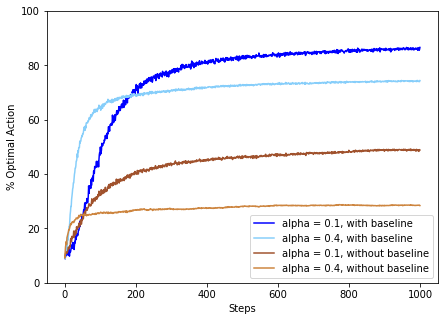

In [6]:
# running and plotting the results

runs = 2000

plt.figure(figsize = (7, 5))

first = run(runs, 0.1, baseline = True); print('First run complete.')
plt.plot(first, color = 'blue', label = 'alpha = 0.1, with baseline')

second = run(runs, 0.4, baseline = True); print('Second run complete.')
plt.plot(second, color = 'lightskyblue', label = 'alpha = 0.4, with baseline')

third = run(runs, 0.1, baseline = False); print('Third run complete.')
plt.plot(third, color = 'sienna', label = 'alpha = 0.1, without baseline')

fourth = run(runs, 0.4, baseline = False); print('Fourth run complete.')
plt.plot(fourth, color = 'peru', label = 'alpha = 0.4, without baseline')

plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.ylim(top = 100, bottom = 0)
plt.legend(loc = 4)

plt.show()